This notebook uses images from relabeling dataset. Preprocessing and augmentation include:

1.   Resize: Stretch to 640x640
2.   Tile: 10 rows x 10 columns
3.   Modify Classes: 0 remapped, 45 dropped(Only contains NRMM related classes )
4.   Filter Null: Require at least 85% of images to contain annotations.

5.   Outputs per training example: 4
6.   Flip: Horizontal, Vertical


Train/Test Split:


*   Training set: 2.5k 88%
*   Validation set: 197 7%
*   Training set: 158 6%

And also try with different model parameters.


##1.Initialization

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 24.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##2. Data Downloading
*   in data.yaml (content/-NRMM-3/data.yaml)file, the path of data need to be exact paths:
  *   test: /content/-NRMM-5/test/images
  *   train: /content/-NRMM-5/train/images
  *   val: /content/-NRMM-5/valid/images

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AXtvn8E5cqIPHd94QNpU")
project = rf.workspace("university-college-london-pmvix").project("nrmm")
dataset = project.version(5).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=aa3181e135f86227b2aaa216add3d2cf92eca887a4dd89fdf7f80f228285cc4a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to -NRMM-5 in yolov8:: 100%|██████████| 5703/5703 [00:00<00:00, 8923.98it/s] 


##3. Model Training

yolov8s,epoch 50

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 346MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/-NRMM-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

/content


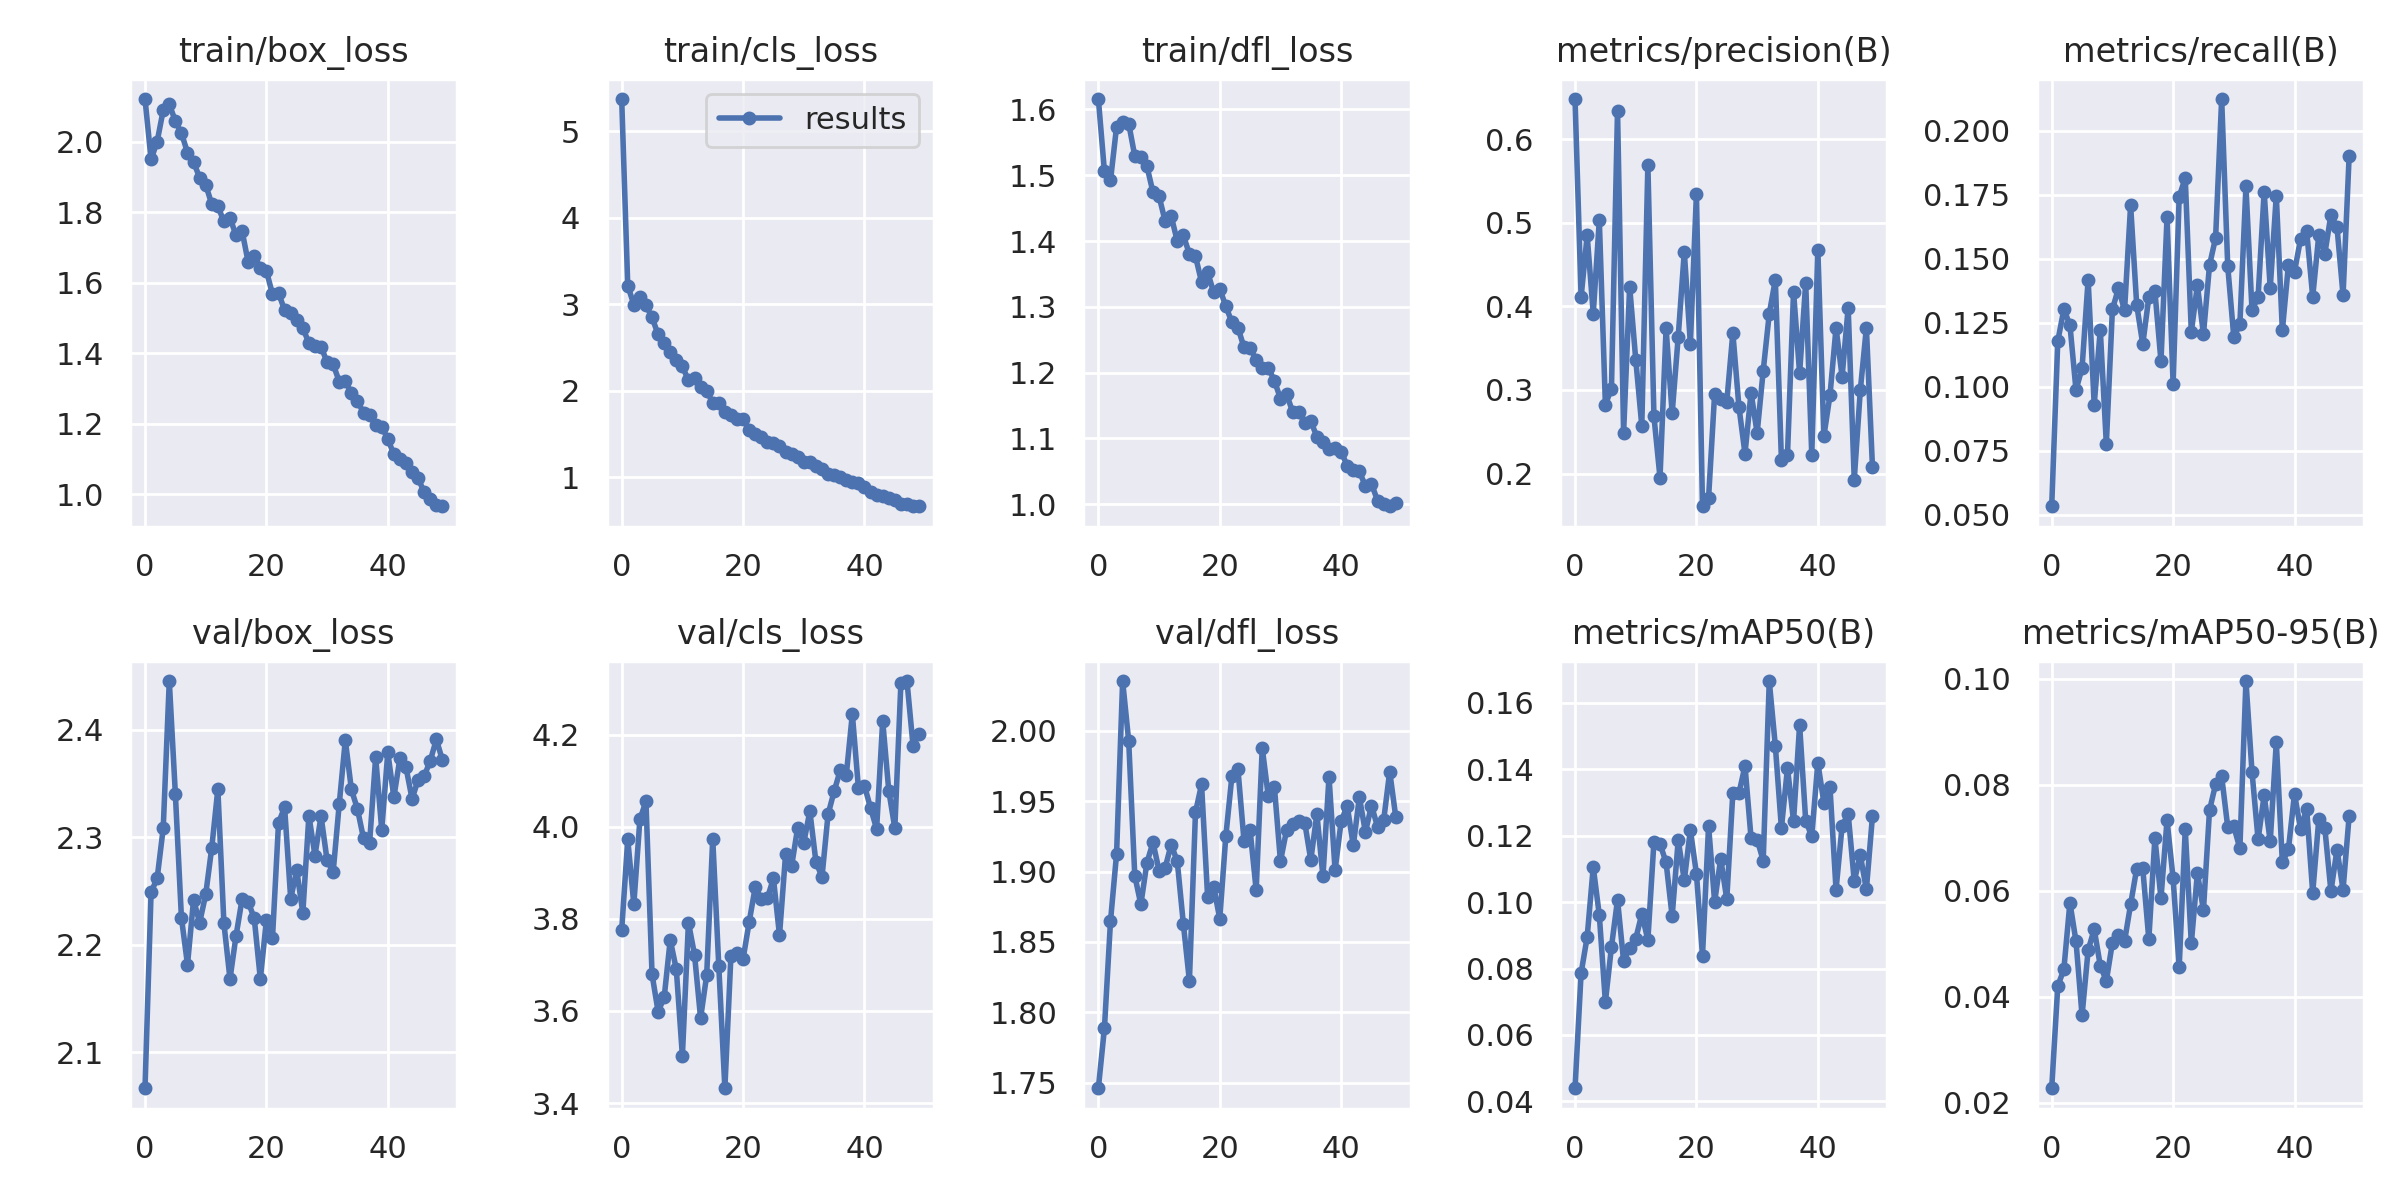

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


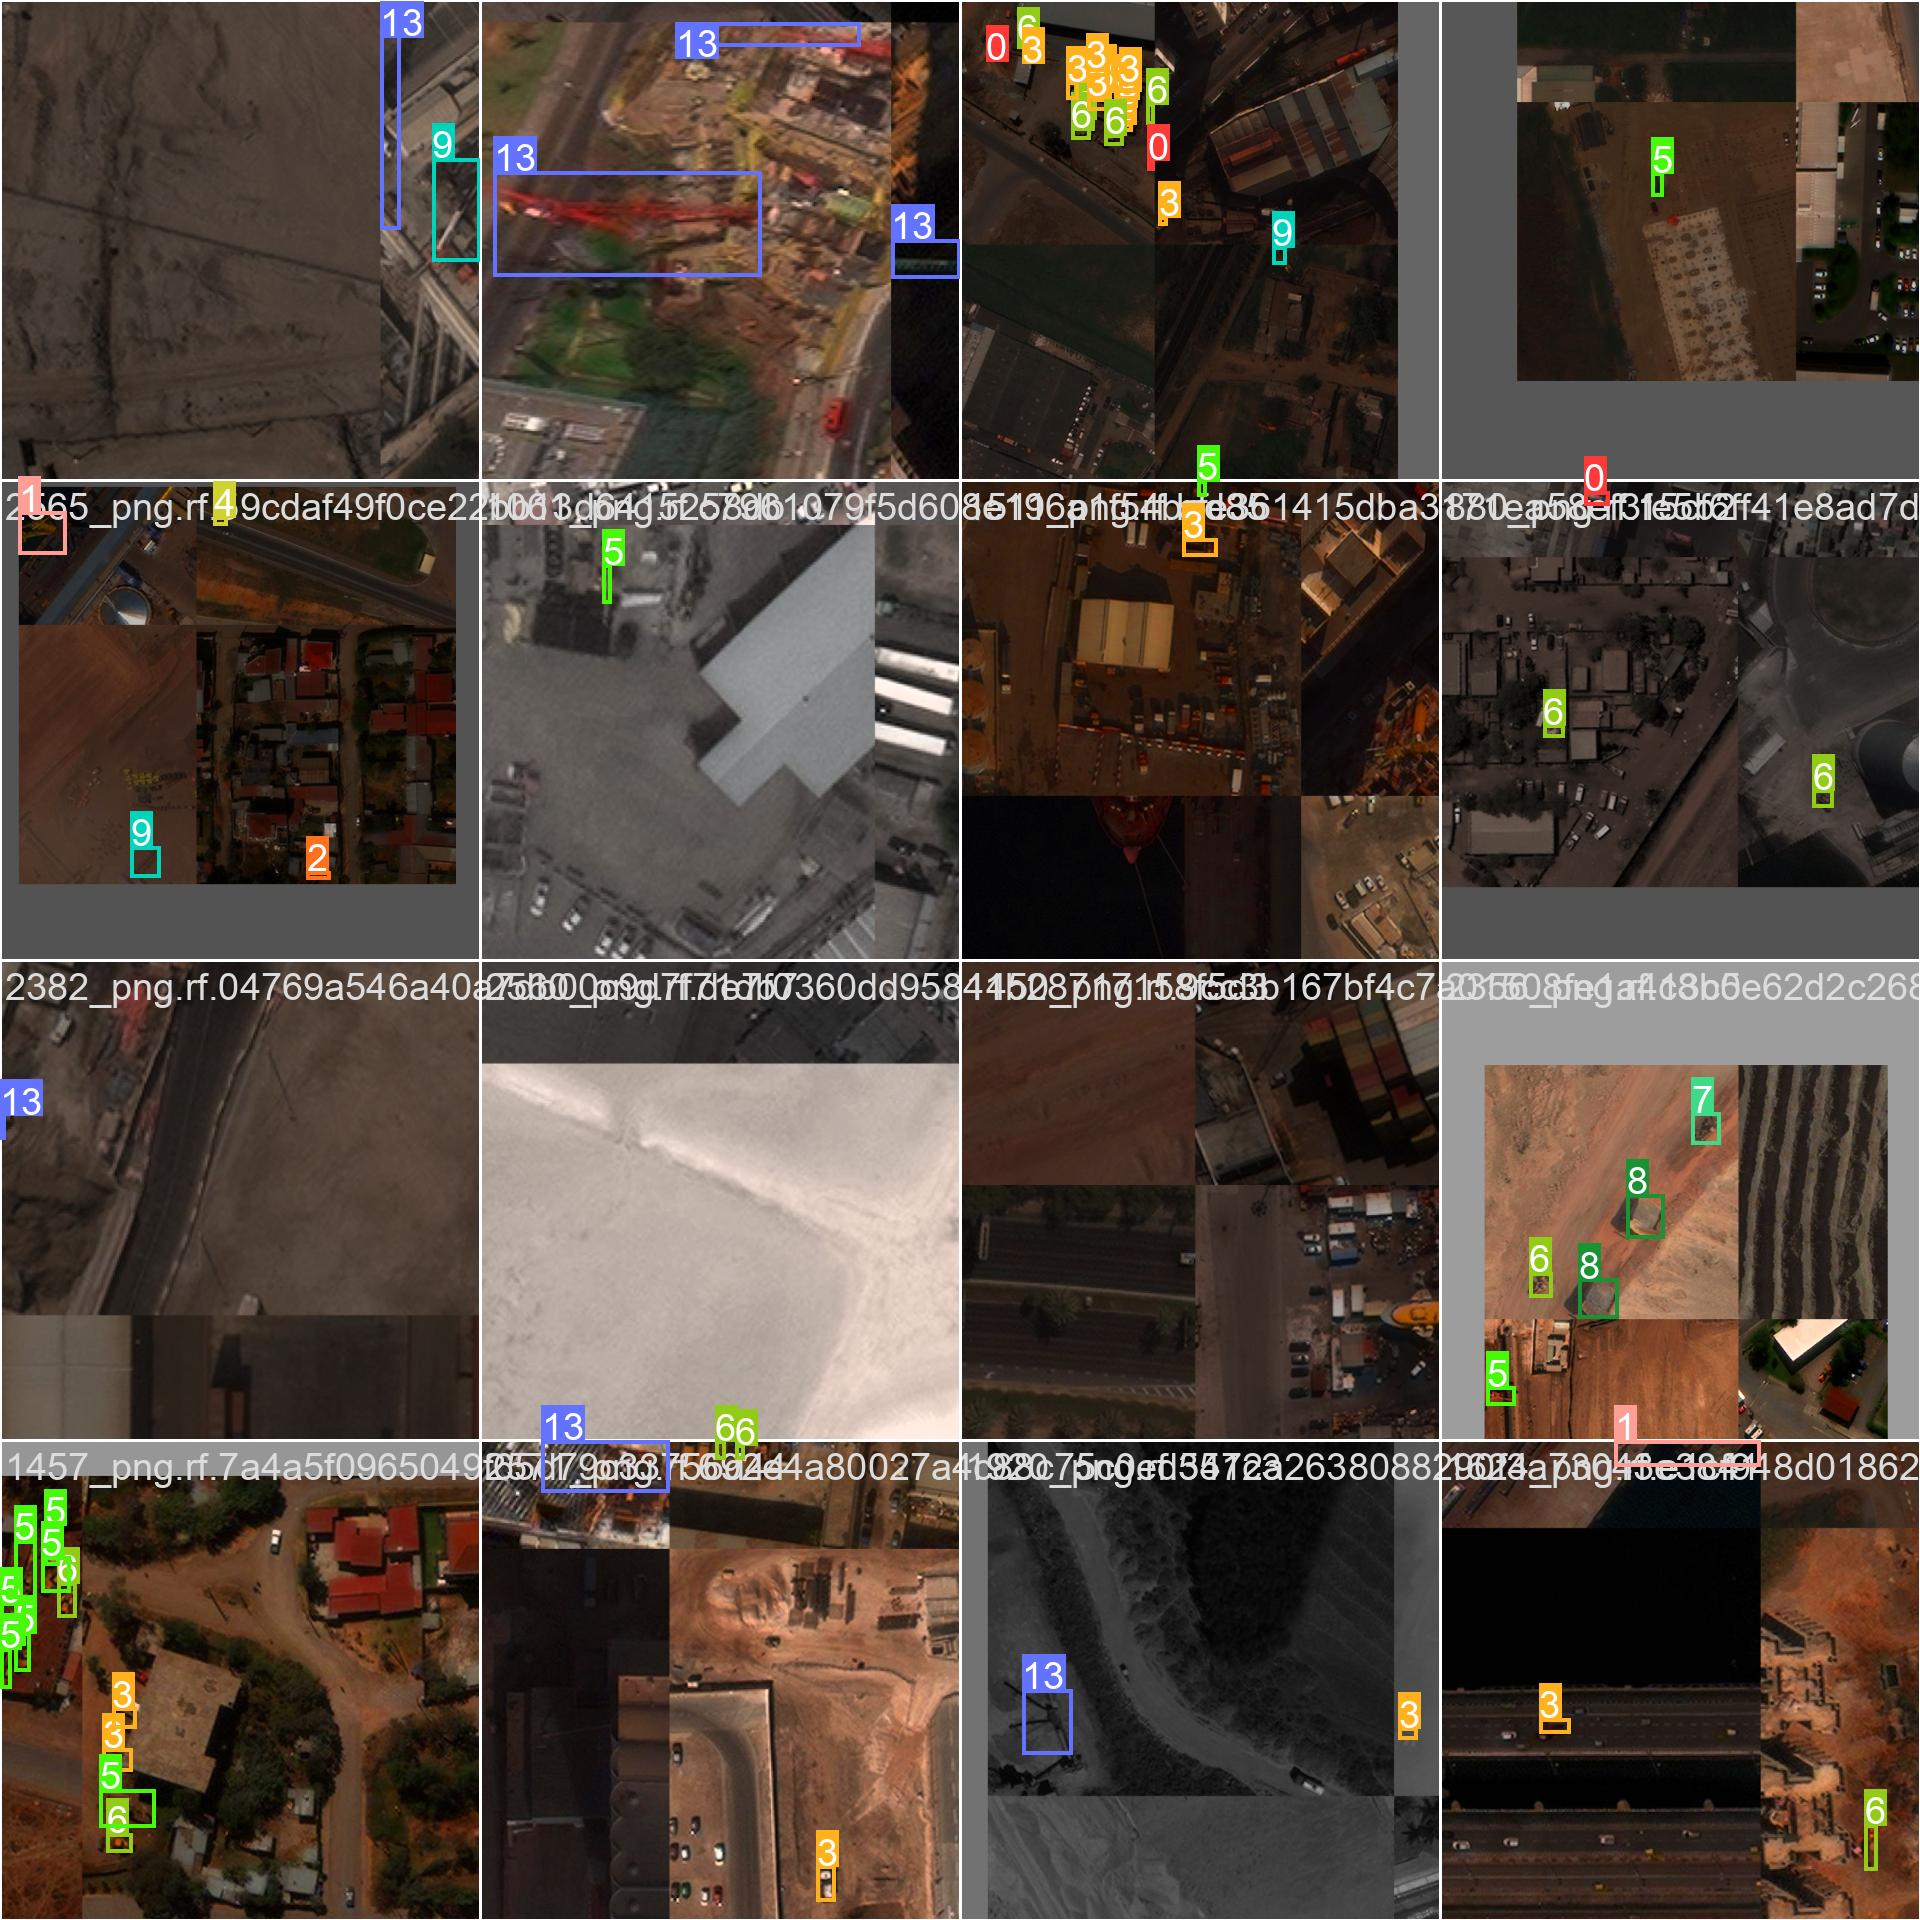

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-11 10:16:50.230139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 10:16:51.090093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/-NRMM-5/valid/labels.cache... 197 images, 25 backgrounds, 0 corrupt: 100% 197/197 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:04<00:00,  2.63it/s]
                   all        197        370      0.391      0.178      0.166     0.0992
          Cement Mixer        197         

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-11 10:17:20.733299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 10:17:21.585072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
image 1/158 /content/-NRMM-5/test/images/1063_png.rf.d0ab40a638137b53111249a7487280a8.jpg: 640x640 16.3ms
image 2/158 /content/-NRMM-5/test/images/1063_png.rf.e4507f1e5062c2b37ae1f05bec3b701a.jpg: 640x640 16.3ms
image 3/158 /content/-NRMM-5/test/images/118_png.rf.1f07ea2a82fa11f0b8970736f011190b.jpg: 640x640 16.3ms
image 4/158 /content/-NRMM-5/test/images/118_png.rf.2915884aa1

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

Save files to google drive:

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os

# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_v4'
if not os.path.exists(save_path):
    os.makedirs(save_path)


Save predict output

In [14]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)


save validation output

In [15]:
import shutil

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

save training output

In [16]:
import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [17]:
#also the model
shutil.copy("/content/runs/detect/train/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_v4/last.pt'

##4. Hyper-parameters tuning

Try with yolov8n

In [ ]:
!pip install tensorflow

##4.Hyper Parameter Tunning

In [ ]:
# Install and update Ultralytics and Ray Tune pacakges
!pip install -U ultralytics 'ray[tune]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [ ]:
from ultralytics import YOLO
from ray import tune

model = YOLO("/content/runs/detect/train2/weights/best.pt")
result_grid = model.tune(data="/content/-NRMM-3/data.yaml")

Output hidden; open in https://colab.research.google.com to view.